<a href="https://colab.research.google.com/github/BeytullahYayla/Computer-Vision-For-Self-Driving-Cars/blob/main/BehavioralCloning/Behavioral_Cloning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Clone Repository Which Contains Dataset

In [101]:
!git clone https://github.com/rslim087a/track

fatal: destination path 'track' already exists and is not an empty directory.


## Import Required Libraries

In [102]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mplim
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2
import pandas as pd
import random
import ntpath

In [103]:
!ls track

driving_log.csv  IMG


In [104]:
import os

In [105]:
path='track'#Dataset path
columns=['center','left','right','steering','throttle','reverse','speed']
data=pd.read_csv(os.path.join(path,'driving_log.csv'),names=columns)
pd.set_option('display.max_colwidth',-1)
data.head()#We can observe our first 5 rows in our pandas dataset.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


,center,left,right,steering,throttle,reverse,speed
0,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_382.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_382.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_382.jpg,0.0,0.0,0.0,0.649786
1,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_670.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_670.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_670.jpg,0.0,0.0,0.0,0.627942
2,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_724.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_724.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_724.jpg,0.0,0.0,0.0,0.622910
3,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_792.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_792.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_792.jpg,0.0,0.0,0.0,0.619162
4,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_860.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_860.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_860.jpg,0.0,0.0,0.0,0.615438


In [106]:
def path_leaf(path):
  head,tail=ntpath.split(path)
  return tail

Our image paths consists of local path which belong to another person. Because we cloned dataset from github. So we need to method that can split our path and returns just with .jpg extension part. <b> path_leaf()</b> method returns our tail of path. 

In [107]:
data['center']=data['center'].apply(path_leaf)
data['left']=data['left'].apply(path_leaf)
data['right']=data['right'].apply(path_leaf)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2018_07_16_17_11_43_382.jpg,left_2018_07_16_17_11_43_382.jpg,right_2018_07_16_17_11_43_382.jpg,0.0,0.0,0.0,0.649786
1,center_2018_07_16_17_11_43_670.jpg,left_2018_07_16_17_11_43_670.jpg,right_2018_07_16_17_11_43_670.jpg,0.0,0.0,0.0,0.627942
2,center_2018_07_16_17_11_43_724.jpg,left_2018_07_16_17_11_43_724.jpg,right_2018_07_16_17_11_43_724.jpg,0.0,0.0,0.0,0.622910
3,center_2018_07_16_17_11_43_792.jpg,left_2018_07_16_17_11_43_792.jpg,right_2018_07_16_17_11_43_792.jpg,0.0,0.0,0.0,0.619162
4,center_2018_07_16_17_11_43_860.jpg,left_2018_07_16_17_11_43_860.jpg,right_2018_07_16_17_11_43_860.jpg,0.0,0.0,0.0,0.615438


We got rid of head part of our paths using apply(path_leaf) for all of our center,left and right image path.

## Distribution of our dataset

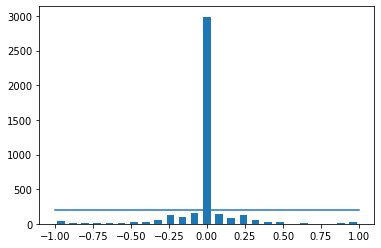

In [108]:
num_bins = 25
samples_per_bin = 200
hist, bins = np.histogram(data['steering'], num_bins)
center = (bins[:-1]+ bins[1:]) * 0.5
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

In [109]:
bins

array([-1.  , -0.92, -0.84, -0.76, -0.68, -0.6 , -0.52, -0.44, -0.36,
       -0.28, -0.2 , -0.12, -0.04,  0.04,  0.12,  0.2 ,  0.28,  0.36,
        0.44,  0.52,  0.6 ,  0.68,  0.76,  0.84,  0.92,  1.  ])

In [110]:
hist

array([  35,    6,    6,    6,   13,    8,   24,   22,   53,  131,   99,
        158, 2990,  137,   86,  126,   54,   22,   19,    2,    9,    4,
          4,    6,   33])

In [111]:
remove_list = []
for j in range(num_bins):
  list_ = []
  for i in range(len(data['steering'])):
    if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_)
  list_ = list_[samples_per_bin:]
  remove_list.extend(list_)

print('removed:', len(remove_list))
data.drop(data.index[remove_list], inplace=True)
print('remaining:', len(data))



removed: 2790
remaining: 1263


Firstly we defined an empty list called <b>remove_list</b>.We have nested loops.First loop iterates the len of the number of the bins.Which consists our steerings.At every iteration we define an empty list to balance our data by removing values that remaining above a certain threshold. In our example this threshold can be considered as 400. After we applied this operation 1463 data is remained. 

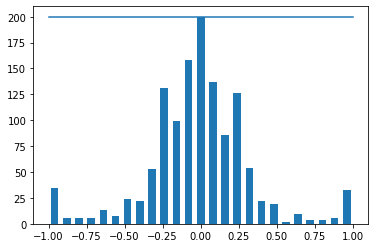

In [112]:

hist, _ = np.histogram(data['steering'], num_bins)

plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

As we can see, now our distrubition of data is more uniformed.

## Training and Validation Split

In [113]:
print(data.iloc[40])
def load_steering(datadir,df):
  image_path=[]
  steering=[]
  for i in range(len(data)):
    indexed_data=data.iloc[i]
    center,left,right=indexed_data[0],indexed_data[1],indexed_data[2]
    image_path.append(os.path.join(datadir,center.strip()))
    steering.append(float(indexed_data[3]))
  image_paths=np.asarray(image_path)
  steerings=np.asarray(steering)
  return image_paths,steerings

image_paths,steerings=load_steering(path+"/IMG",data)


center      center_2018_07_16_17_11_48_520.jpg
left        left_2018_07_16_17_11_48_520.jpg  
right       right_2018_07_16_17_11_48_520.jpg 
steering   -0.21399                           
throttle    1.0                               
reverse     0.0                               
speed       30.19007                          
Name: 66, dtype: object


In [114]:
X_train,X_val,y_train,y_val=train_test_split(image_paths,steerings,random_state=6,shuffle=True,test_size=0.2)
print("Train_size:{}\nTest_size:{}".format(len(X_train),len(X_val)))

Train_size:1010
Test_size:253


Text(0.5, 1.0, 'y_val distribution')

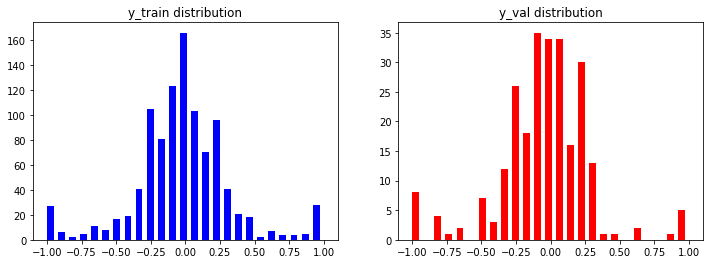

In [115]:
fig,axes=plt.subplots(1,2,figsize=(12,4))
axes[0].hist(y_train,bins=num_bins,width=0.05,color='blue')
axes[0].set_title("y_train distribution")
axes[1].hist(y_val,bins=num_bins,width=0.05,color='red')
axes[1].set_title("y_val distribution")

## Image Preprocessing

In [135]:
def img_preprocess(img):
    img = img[60:135,:,:]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img,  (3, 3), 0)
    img = cv2.resize(img, (200, 66))
    img = img/255
    return img

track/IMG/center_2018_07_16_17_12_35_993.jpg


Text(0.5, 1.0, 'Preprocessed image')

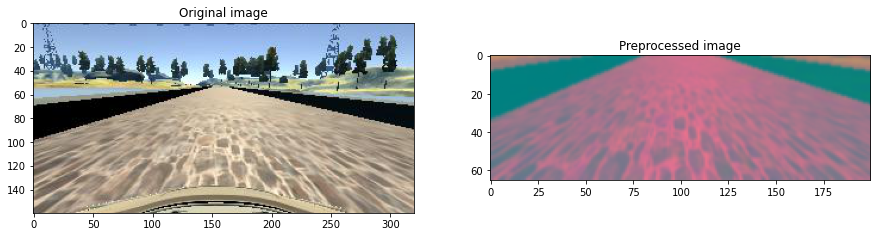

In [136]:
img_path=X_train[100]
print(img_path)
fig,axs=plt.subplots(1,2,figsize=(15,10))
original_image=mplim.imread(img_path)
axs[0].imshow(original_image)
axs[0].set_title("Original image")
preprocessed_image=img_preprocess(original_image)
axs[1].imshow(preprocessed_image)
axs[1].set_title("Preprocessed image")

In [137]:
X_train=np.array(list(map(img_preprocess,X_train)))
X_val=np.array(list(map(img_preprocess,X_val)))

TypeError: ignored

In [ ]:
plt.imshow(X_train[random.randint(0,len(X_train)-1)])